In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample # module for resampling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.neural_network import MLPClassifier

import statistics
import math
import time
from datetime import datetime

from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
#read in the csv
MY_PATH = "./datasets/training_dataset_V3.csv"
data = pd.read_csv(MY_PATH)

# Take a look at the data

In [3]:
data.head()

,Unnamed: 0,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,...,most_recent_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
0,0,2019-12-16,Monday,2019,21350,U0109015,Owner Operator,CA&F TRUCKING,Maywood,CA,...,2021-02-17,2019-12-16,2,0,438,438,0,45,45,483
1,1,2021-01-15,Friday,2021,36437,C0097727,Fleet,New opportunities inc,Los Angeles,CA,...,2021-02-03,2021-01-15,1,2,72,74,0,1,1,75
2,2,2019-12-26,Thursday,2019,19323,U0107081,Owner Operator,RAS,Compton,CA,...,2020-09-25,2019-12-26,1,0,180,180,0,2,2,182
3,3,2021-02-10,Wednesday,2021,34809,C0094651,Fleet,NFS asset Drayage,Lynwood,CA,...,2021-02-17,2021-02-10,3,0,0,0,0,0,0,62
4,4,2017-07-24,Monday,2017,4728,U0094376,Owner Operator,joes transportation,Norco,CA,...,2017-10-11,2017-07-24,2,57,0,57,314,0,314,371


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83414 entries, 0 to 83413
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                83414 non-null  int64  
 1   dt                        83414 non-null  object 
 2   weekday                   83414 non-null  object 
 3   year                      83414 non-null  int64  
 4   id_driver                 83414 non-null  int64  
 5   id_carrier_number         83414 non-null  object 
 6   dim_carrier_type          83414 non-null  object 
 7   dim_carrier_company_name  83365 non-null  object 
 8   home_base_city            83369 non-null  object 
 9   home_base_state           83369 non-null  object 
 10  carrier_trucks            83414 non-null  object 
 11  num_trucks                83344 non-null  float64
 12  interested_in_drayage     83414 non-null  object 
 13  port_qualified            83414 non-null  object 
 14  signup

In [5]:
data.describe()

,Unnamed: 0,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
count,83414.000000,83414.000000,83414.000000,83344.000000,71124.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000
mean,41706.500000,2018.960930,18222.414954,22.582921,298.752489,2.076270,29.477762,71.579675,101.057436,148.258422,13.073021,161.331443,266.502661
std,24079.692014,1.359343,11667.704926,48.829719,390.345107,2.672163,88.171940,194.532776,214.502147,415.978060,42.241592,413.792137,448.806175
min,0.000000,2015.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,20853.250000,2018.000000,7890.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,37.000000
50%,41706.500000,2019.000000,16299.000000,4.000000,61.000000,1.000000,2.000000,0.000000,13.000000,15.000000,0.000000,37.000000,110.000000
75%,62559.750000,2020.000000,28974.000000,14.000000,497.000000,2.000000,23.000000,18.000000,94.000000,112.000000,1.000000,135.000000,325.000000
max,83413.000000,2021.000000,38125.000000,195.000000,1653.000000,129.000000,902.000000,1324.000000,1348.000000,4266.000000,371.000000,4266.000000,4266.000000


In [6]:
# Drop extra column

data = data.drop(labels=['Unnamed: 0'], axis=1)
data.head()

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,most_recent_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
0,2019-12-16,Monday,2019,21350,U0109015,Owner Operator,CA&F TRUCKING,Maywood,CA,"[""poweronly""]",...,2021-02-17,2019-12-16,2,0,438,438,0,45,45,483
1,2021-01-15,Friday,2021,36437,C0097727,Fleet,New opportunities inc,Los Angeles,CA,"[""poweronly"", ""boxtruck""]",...,2021-02-03,2021-01-15,1,2,72,74,0,1,1,75
2,2019-12-26,Thursday,2019,19323,U0107081,Owner Operator,RAS,Compton,CA,"[""poweronly""]",...,2020-09-25,2019-12-26,1,0,180,180,0,2,2,182
3,2021-02-10,Wednesday,2021,34809,C0094651,Fleet,NFS asset Drayage,Lynwood,CA,"[""poweronly"", ""dryvan""]",...,2021-02-17,2021-02-10,3,0,0,0,0,0,0,62
4,2017-07-24,Monday,2017,4728,U0094376,Owner Operator,joes transportation,Norco,CA,"[""dryvan""]",...,2017-10-11,2017-07-24,2,57,0,57,314,0,314,371


# Part 1: Generate labels
## drivers in the 75th percentile of ‘loads’ and the 75th percentile of ‘most_recent_load_date’ are assigned a label of 1 (indicating a high performing driver) with all others being assigned a 0 - (NOTE: your labels will likely be unbalanced. 

### pre-work from Piazza that must be done

- collapse your rows by trimming any duplicative entries per-driver, and only leaving the most recent (and therefore cumulative with regards to features like loads) entry. 
- Thereby each row is it's own driver, and it more closely fits the desired model. 
- If you take this approach, it would be worth playing around with different augmentations to provide additional nuance to your data. (e.g., while you have a total count of loads, you don't have a clear indication of the distribution of those loads. Is this an older driver who was active several years ago but now works irregularly, or is this a new driver that's been very active in the last few months?) Boiling up that kind of data into your features could be incredibly powerful.

In [7]:
def preprocess_data(dataset, testing=False):

    #for each duplicate of a driver id 'id_driver', cumulate the 'load' values for this driver 
    #AND add the median load for this driver as a new column 'median_load'

    drivers = list(set(dataset['id_driver'])) #get rid of duplicates
    rows_to_keep = []
    median_loads = []

    for d in drivers:
        loads_for_driver = dataset.loc[dataset['id_driver'] == d]
        
        most_recent_date = ""
        
        if testing:
            dates = list(dataset.loc[dataset['id_driver'] == d]['dt'])
            dates.sort(reverse=True)
            most_recent_date = dates[0]
        else:
            most_recent_date = list(loads_for_driver['most_recent_load_date'])[0]

        loads = sum(loads_for_driver['loads'])
        median_load = statistics.median(list(loads_for_driver['loads']))

        row = loads_for_driver.loc[loads_for_driver['dt'] == most_recent_date]
        if row.empty:
            dates = list(dataset.loc[dataset['id_driver'] == d]['dt'])
            dates.sort(reverse=True)
            next_recent_date = dates[0]
            row = loads_for_driver.loc[loads_for_driver['dt'] == next_recent_date]
        
        row['median_load'] = median_load
        row['loads'] = loads
        
        if len(row) > 1:
            row = row.head(1)

        rows_to_keep.append(row)
        
    #create new dataframe with unique drivers
    unique_data = pd.concat(rows_to_keep)
    print("rows to keep:", len(rows_to_keep))
    print("rows in unique_data:", len(unique_data))
    
    return unique_data


In [8]:
# DF with one row per driver, created from rows_to_keep -- ISSUE somehow goes from 5288 -> 5255

condensed_data = data #preprocess_data(data)
condensed_data.head()

# condensed_data = pd.concat(rows_to_keep)
# print("rows to keep:", len(rows_to_keep))
# print("rows in condensed_data:", len(condensed_data))
# condensed_data.head()

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,most_recent_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
0,2019-12-16,Monday,2019,21350,U0109015,Owner Operator,CA&F TRUCKING,Maywood,CA,"[""poweronly""]",...,2021-02-17,2019-12-16,2,0,438,438,0,45,45,483
1,2021-01-15,Friday,2021,36437,C0097727,Fleet,New opportunities inc,Los Angeles,CA,"[""poweronly"", ""boxtruck""]",...,2021-02-03,2021-01-15,1,2,72,74,0,1,1,75
2,2019-12-26,Thursday,2019,19323,U0107081,Owner Operator,RAS,Compton,CA,"[""poweronly""]",...,2020-09-25,2019-12-26,1,0,180,180,0,2,2,182
3,2021-02-10,Wednesday,2021,34809,C0094651,Fleet,NFS asset Drayage,Lynwood,CA,"[""poweronly"", ""dryvan""]",...,2021-02-17,2021-02-10,3,0,0,0,0,0,0,62
4,2017-07-24,Monday,2017,4728,U0094376,Owner Operator,joes transportation,Norco,CA,"[""dryvan""]",...,2017-10-11,2017-07-24,2,57,0,57,314,0,314,371


In [9]:
condensed_data.describe()

,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,total_loads
count,83414.000000,83414.000000,83344.000000,71124.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000,83414.000000
mean,2018.960930,18222.414954,22.582921,298.752489,2.076270,29.477762,71.579675,101.057436,148.258422,13.073021,161.331443,266.502661
std,1.359343,11667.704926,48.829719,390.345107,2.672163,88.171940,194.532776,214.502147,415.978060,42.241592,413.792137,448.806175
min,2015.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2018.000000,7890.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,37.000000
50%,2019.000000,16299.000000,4.000000,61.000000,1.000000,2.000000,0.000000,13.000000,15.000000,0.000000,37.000000,110.000000
75%,2020.000000,28974.000000,14.000000,497.000000,2.000000,23.000000,18.000000,94.000000,112.000000,1.000000,135.000000,325.000000
max,2021.000000,38125.000000,195.000000,1653.000000,129.000000,902.000000,1324.000000,1348.000000,4266.000000,371.000000,4266.000000,4266.000000


In [10]:
condensed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83414 entries, 0 to 83413
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   dt                        83414 non-null  object 
 1   weekday                   83414 non-null  object 
 2   year                      83414 non-null  int64  
 3   id_driver                 83414 non-null  int64  
 4   id_carrier_number         83414 non-null  object 
 5   dim_carrier_type          83414 non-null  object 
 6   dim_carrier_company_name  83365 non-null  object 
 7   home_base_city            83369 non-null  object 
 8   home_base_state           83369 non-null  object 
 9   carrier_trucks            83414 non-null  object 
 10  num_trucks                83344 non-null  float64
 11  interested_in_drayage     83414 non-null  object 
 12  port_qualified            83414 non-null  object 
 13  signup_source             83414 non-null  object 
 14  ts_sig

In [11]:
# compute the 75th percentile for total loads 
# (piazza @222 says to use 75th percentile from whole dataset before dropping duplicates)
load_percentile = data["total_loads"].quantile(0.75)
print("75th percentile of total_loads for full dataset:", load_percentile)

75th percentile of total_loads for full dataset: 325.0


In [12]:
# convert date to date object 
data.most_recent_load_date = [pd.to_datetime(d) for d in data.most_recent_load_date]
condensed_data.most_recent_load_date = [pd.to_datetime(d) for d in condensed_data.most_recent_load_date]

# calculate 75th percentile for most_recent_load_date in full dataset 
date_percentile = data["most_recent_load_date"].quantile(0.75)
print("75th percentile of most_recent_load_date for full dataset:", date_percentile)

75th percentile of most_recent_load_date for full dataset: 2021-02-14 00:00:00


In [13]:
# create a new column and use np.where to assign values based on most_recent_load_date and total_loads
condensed_data["high_performing"] = np.where((condensed_data["most_recent_load_date"] >= date_percentile) 
                                             & (condensed_data["total_loads"] >= load_percentile), 1, 0)

n_high_performers = len(condensed_data.loc[condensed_data["high_performing"] == 1])
n_non_high_performers = len(condensed_data.loc[condensed_data["high_performing"] == 0])


print("high performing drivers:", n_high_performers)
print("low performing drivers:", n_non_high_performers)

high performing drivers: 10393
low performing drivers: 73021


## Balance data

In [14]:
# balancing data by upsampling the high-performing drivers
majority = condensed_data[condensed_data["high_performing"] == 0]
minority = condensed_data[condensed_data["high_performing"] == 1]

# want to sample high-performers with replacement to match the number of non-high performing drivers
minority_upsampled = resample(minority, replace=True, n_samples=n_non_high_performers, random_state=42)
upsampled_data = pd.concat([majority, minority_upsampled])
upsampled_data["high_performing"].value_counts()

1    73021
0    73021
Name: high_performing, dtype: int64

# Step 2: Drop ‘load’ and ‘most_recent_load_date’ from your data frame 
Since those fields are
being directly used to label your data please remove them from your training and
testing cohorts.

In [15]:
# condensed_data = condensed_data.drop(labels=['total_loads', 'most_recent_load_date'], axis=1)
# condensed_data.info()

upsampled_data

upsampled_data = upsampled_data.drop(labels=['total_loads', 'most_recent_load_date'], axis=1)
upsampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 146042 entries, 1 to 61672
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   dt                        146042 non-null  object 
 1   weekday                   146042 non-null  object 
 2   year                      146042 non-null  int64  
 3   id_driver                 146042 non-null  int64  
 4   id_carrier_number         146042 non-null  object 
 5   dim_carrier_type          146042 non-null  object 
 6   dim_carrier_company_name  145993 non-null  object 
 7   home_base_city            145997 non-null  object 
 8   home_base_state           145997 non-null  object 
 9   carrier_trucks            146042 non-null  object 
 10  num_trucks                145972 non-null  float64
 11  interested_in_drayage     146042 non-null  object 
 12  port_qualified            146042 non-null  object 
 13  signup_source             146042 non-null  ob

# 3. Run some basic statistics on your variables including correlations with labels and report findings 

1    73021
0    73021
Name: high_performing, dtype: int64


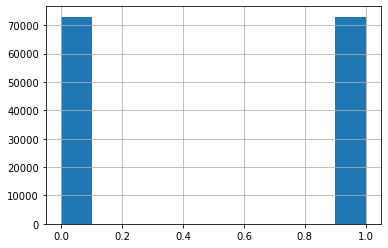

In [16]:
print(upsampled_data['high_performing'].value_counts())
upsampled_data['high_performing'].hist()
plt.show()

In [17]:
upsampled_data.describe()

,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,high_performing
count,146042.000000,146042.000000,145972.000000,126768.000000,146042.000000,146042.000000,146042.000000,146042.000000,146042.000000,146042.000000,146042.000000,146042.000000
mean,2019.340032,19981.389504,14.307360,221.190340,2.743047,44.206701,184.260726,228.467427,273.292265,26.777790,300.070055,0.500000
std,1.219231,11154.557439,38.269847,356.937983,3.590676,104.755875,323.478579,333.288309,681.373982,58.643073,673.390689,0.500002
min,2015.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,11068.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16.000000,0.000000
50%,2020.000000,19708.000000,1.000000,7.000000,2.000000,2.000000,0.000000,55.000000,16.000000,0.000000,74.000000,0.500000
75%,2020.000000,30048.000000,8.000000,362.000000,3.000000,27.000000,311.000000,361.000000,226.000000,30.000000,239.000000,1.000000
max,2021.000000,38125.000000,195.000000,1653.000000,129.000000,902.000000,1324.000000,1348.000000,4266.000000,371.000000,4266.000000,1.000000


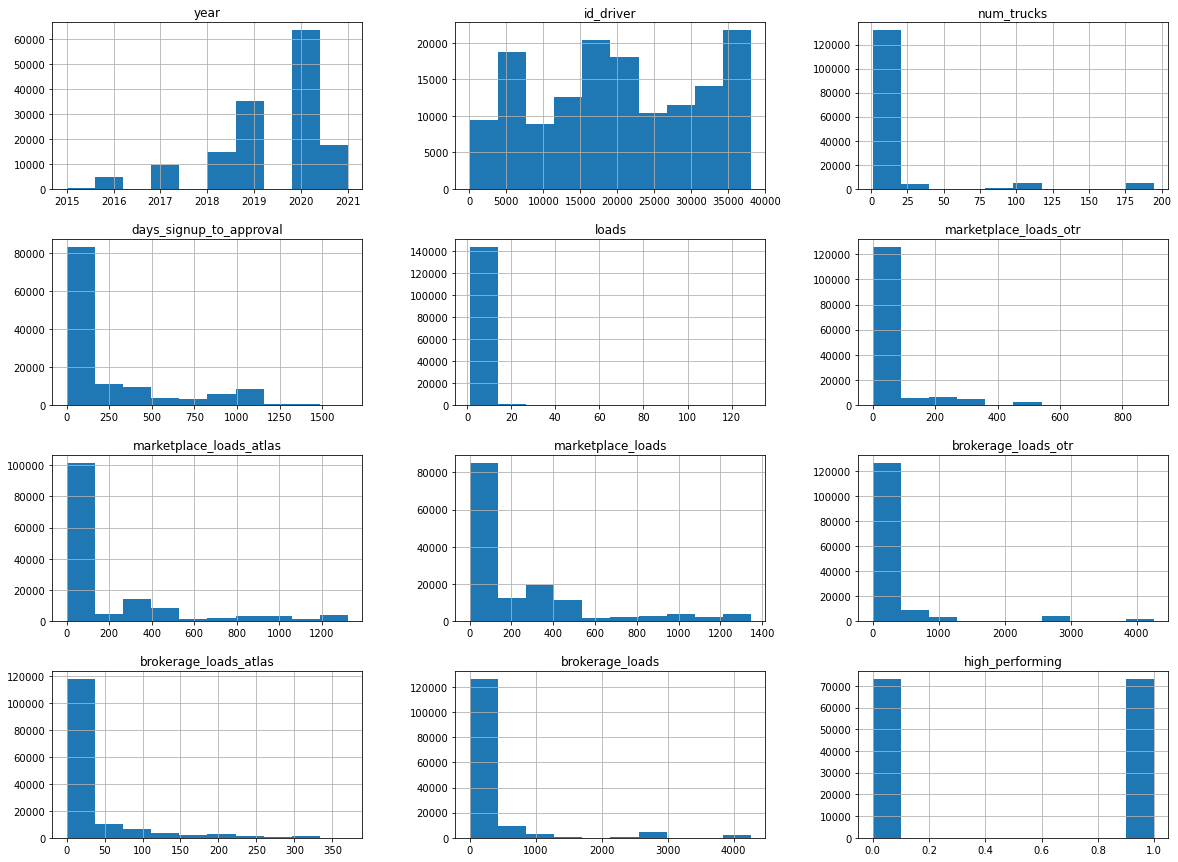

In [18]:
upsampled_data.hist(figsize=(20,15))
plt.show()

In [19]:
corr_matrix = upsampled_data.corr()
corr_matrix

,year,id_driver,num_trucks,days_signup_to_approval,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,high_performing
year,1.000000,0.703347,-0.003662,-0.583740,0.193867,0.000828,0.346631,0.336689,-0.030521,0.319518,-0.003057,0.413421
id_driver,0.703347,1.000000,0.066560,-0.757443,0.172823,-0.131632,0.337512,0.286205,-0.239629,0.398433,-0.207772,0.209187
num_trucks,-0.003662,0.066560,1.000000,0.101380,-0.053324,-0.118539,-0.182917,-0.214800,-0.021919,-0.133304,-0.033788,-0.287793
days_signup_to_approval,-0.583740,-0.757443,0.101380,1.000000,-0.174205,0.044929,-0.283064,-0.263166,0.023026,-0.238407,-0.003918,-0.284273
loads,0.193867,0.172823,-0.053324,-0.174205,1.000000,-0.099145,0.218817,0.181215,0.340238,0.176381,0.359632,0.246657
marketplace_loads_otr,0.000828,-0.131632,-0.118539,0.044929,-0.099145,1.000000,-0.066857,0.249421,-0.072885,-0.135782,-0.085574,0.188727
marketplace_loads_atlas,0.346631,0.337512,-0.182917,-0.283064,0.218817,-0.066857,1.000000,0.949553,-0.216406,0.387280,-0.185245,0.462481
marketplace_loads,0.336689,0.286205,-0.214800,-0.263166,0.181215,0.249421,0.949553,1.000000,-0.232945,0.333203,-0.206689,0.508188
brokerage_loads_otr,-0.030521,-0.239629,-0.021919,0.023026,0.340238,-0.072885,-0.216406,-0.232945,1.000000,-0.178369,0.996322,0.245756
brokerage_loads_atlas,0.319518,0.398433,-0.133304,-0.238407,0.176381,-0.135782,0.387280,0.333203,-0.178369,1.000000,-0.093397,0.310236


In [20]:
corr_matrix["high_performing"].sort_values(ascending=False)

high_performing            1.000000
marketplace_loads          0.508188
marketplace_loads_atlas    0.462481
year                       0.413421
brokerage_loads_atlas      0.310236
brokerage_loads            0.275687
loads                      0.246657
brokerage_loads_otr        0.245756
id_driver                  0.209187
marketplace_loads_otr      0.188727
days_signup_to_approval   -0.284273
num_trucks                -0.287793
Name: high_performing, dtype: float64

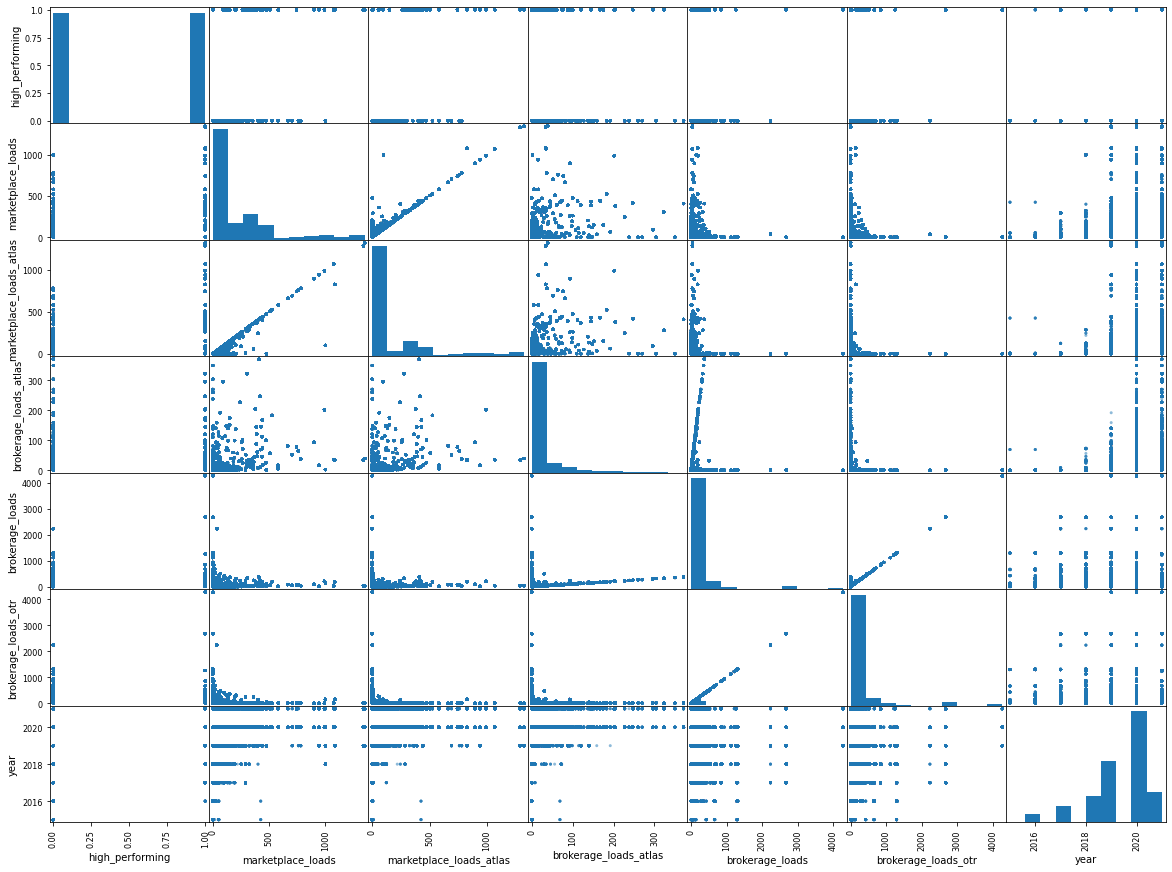

In [22]:
attributes = ["high_performing", "marketplace_loads", "marketplace_loads_atlas",
              "brokerage_loads_atlas", 'brokerage_loads', 'brokerage_loads_otr', "year"]
scatter_matrix(upsampled_data[attributes], figsize=(20, 15))
plt.show()

### Findings: 

All of the loads-related columns are extremely right-skewed. On average, drivers have been assigned more jobs through brokers than through the NEXT marketplace. For loads assigned through brokers, they are more likely to be OTR loads than drayage jobs. The median loads that a driver carries per job is 1.

`marketplace_loads` and `marketplace_loads_atlas` have a very high correlation with `high_performing` of over 0.5 each. `brokerage_loads_atlas`, `brokerage_loads`, and `brokerage_loads_otr` also have moderate correlations with `high_performing`. `marketplace_loads` is highly correlated to `marketplace_loads_atlas` and moderately correlated to `marketplace_loads_otr`, showing some collinearity within the dataset. `brokerage_loads` is very highly correlated to `brokerage_loads_otr`. 

# 4. Create a data feature extraction plan and implement a pipeline to execute it

a. Determine which fields to retain and which to drop.

b. For those you retain, determine a categorization strategy

c. Determine an imputation strategy (you should choose more than one imputation
method depending on the specifics of your data

d. Augment at least one feature, ideally a feature cross, or non-linear transition

e. Determine a strategy for scaling features

f. Implement a single pipeline to execute this transformation

g. Document your data strategy in your report. Provide an explanation or
justification for why you chose the data you did, and also detail any experiments
you ran and the results

In [23]:
upsampled_data.isnull().sum()

dt                               0
weekday                          0
year                             0
id_driver                        0
id_carrier_number                0
dim_carrier_type                 0
dim_carrier_company_name        49
home_base_city                  45
home_base_state                 45
carrier_trucks                   0
num_trucks                      70
interested_in_drayage            0
port_qualified                   0
signup_source                    0
ts_signup                        0
ts_first_approved            19274
days_signup_to_approval      19274
driver_with_twic                 0
dim_preferred_lanes         142630
first_load_date                  0
load_day                         0
loads                            0
marketplace_loads_otr            0
marketplace_loads_atlas          0
marketplace_loads                0
brokerage_loads_otr              0
brokerage_loads_atlas            0
brokerage_loads                  0
high_performing     

## Pipeline

In [24]:
unlabeled = upsampled_data.drop("high_performing", axis=1)
labels = upsampled_data["high_performing"].copy()

#### pipeline function

In [27]:
def pipeline(unlabeled):

    # drop features 
    unlabeled = unlabeled.drop(labels=['load_day',                       #redundant on dt
                                      'id_driver','id_carrier_number',    #not relevant
                                      'dim_carrier_company_name', 'home_base_city', #too many values to OHE
                                      'dim_preferred_lanes', 'ts_first_approved', 'days_signup_to_approval'  #too many null values
                                      
                                      ], axis=1) 

    #impuatation
    state_mode = str(unlabeled['home_base_state'].mode())
    unlabeled['home_base_state'] = unlabeled['home_base_state'].fillna(state_mode) # mode value - 87% are CA 

    truck_median = unlabeled['num_trucks'].median()
    unlabeled['num_trucks'] = unlabeled['num_trucks'].fillna(truck_median) # right-skewed so use median
    
    #augmentation
    unlabeled["marketplace_ratio"] = unlabeled["marketplace_loads"]/(unlabeled["marketplace_loads"]+unlabeled["brokerage_loads"])
    
    #categorization
    
    # change date representations to ints
    unlabeled['dt'] = unlabeled['dt'].apply(lambda d : int(pd.to_datetime(d).timestamp()))
    unlabeled['ts_signup'] = unlabeled['ts_signup'].apply(lambda d : int(pd.to_datetime(d).timestamp()))
    unlabeled['first_load_date'] = unlabeled['first_load_date'].apply(lambda d : int(pd.to_datetime(d).timestamp()))
#     unlabeled['recent_date'] = unlabeled['recent_date'].apply(lambda d : int(pd.to_datetime(d).timestamp()))


    # group by numeric or categorical
    data_num = ['year','num_trucks', 'loads', 
                'marketplace_loads_otr', 'marketplace_loads_atlas','marketplace_loads', 
                'brokerage_loads_otr', 'brokerage_loads_atlas', 'brokerage_loads', 
                 'dt', 'ts_signup','first_load_date']
    data_cat = ['weekday', 'dim_carrier_type','home_base_state', 'carrier_trucks', 'interested_in_drayage', 'port_qualified',
               'signup_source', 'driver_with_twic']
    
    #full pipeline
    num_pipeline = Pipeline([
            ('imputer', SimpleImputer(strategy="median")),
    #         ('attribs_adder', AugmentFeatures()),
            ('std_scaler', StandardScaler()),
        ])

    numerical_features = data_num
    categorical_features = data_cat

    full_pipeline = ColumnTransformer([
            ("num", num_pipeline, numerical_features),
            ("cat", OneHotEncoder(), categorical_features),
        ])

    prepared_data = full_pipeline.fit_transform(unlabeled)
    return prepared_data

    

In [28]:
prepared_data = pipeline(unlabeled)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(prepared_data, labels, test_size=0.2, random_state=10)

# 5. Implement a basic Logistic Regression - 
** piazza post corrected to logistic from linear

With your newly pipelined data, find and interpret important features (e.g. using regression and associated p-values). If there are any collinearities be careful when incorporating them into the regression.

Accuracy:    0.945599
Precision:   0.918237
Recall:      0.978207
F1 Score:    0.947274


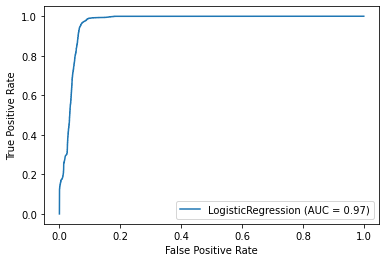

In [30]:
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)
log_predicted = log_reg.predict(X_test)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, log_predicted)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, log_predicted)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, log_predicted)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, log_predicted)))

#ROC curve
metrics.plot_roc_curve(log_reg, X_test, y_test)  
plt.show()  

In [31]:
log_reg.coef_.shape

(1, 86)

### not sure how to interpret important features or p-values?? watching this piazza post https://piazza.com/class/kjdcwsz1c306g7?cid=251

# 6. PCA

We used TruncatedSVD (singular value decomposition) instead of PCA for this step because SVD works better with sparse matrices.

In [32]:
svd = TruncatedSVD(n_components=10, random_state=10)
svd.fit(X_train)
print(svd.explained_variance_ratio_)

X_train_transformed = svd.transform(X_train)
X_test_transformed = svd.transform(X_test)

[0.33999428 0.00435702 0.14565614 0.10626715 0.0829633  0.06170699
 0.04321269 0.04065043 0.02606269 0.02481053]


# 7. Ensemble Method

In [33]:
# Employ an ensemble method

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
bc.fit(X_train_transformed, y_train)
bc_pred = bc.predict(X_test_transformed)


print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, bc_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, bc_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, bc_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, bc_pred)))
# BRUH

Accuracy:    0.999521
Precision:   0.999041
Recall:      1.000000
F1 Score:    0.999521


# 8. Neural Network

In [34]:
nn = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(50,50))
nn.fit(X_train_transformed, y_train)
nn_pred = nn.predict(X_test_transformed)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, nn_pred)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, nn_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, nn_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, nn_pred)))

Accuracy:    0.999897
Precision:   0.999931
Recall:      0.999863
F1 Score:    0.999897


# 9. Cross Validation

Cross-Validate your training results - Employ K-Fold Cross-validation to your training
regimen for both ensemble and NN classifers. (Optional: employ a stratifiedshufflesplit
as well to ensure equitable distribution along a key parameter)

In [35]:
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std

transformed_data = svd.transform(prepared_data)

# Ensemble
cv = KFold(n_splits=10)
bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
# create model
scores = cross_val_score(bc, transformed_data, labels, scoring='accuracy', cv=cv)

# report performance
print('Accuracy: %.4f (%.3f)' % (mean(scores), std(scores)))


# NN
cv = KFold(n_splits=10)
nn = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(50,50))

# evaluate model
scores = cross_val_score(nn, transformed_data, labels, scoring='accuracy', cv=cv)
# report performance
print('Accuracy: %.4f (%.3f)' % (mean(scores), std(scores)))

KeyboardInterrupt: 

# 10. Custom Models

### Support Vector Machine

In [ ]:
svm = SVC(random_state=10) 
svm.fit(X_train_transformed, y_train)

svm_pred = svm.predict(X_test_transformed) 

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, svm_pred))) 
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, svm_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, svm_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, svm_pred)))

### Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train_transformed, y_train)
gnb_pred = gnb.predict(X_test_transformed)

print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, gnb_pred))) 
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, gnb_pred)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, gnb_pred)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, gnb_pred)))

# Testing

In [36]:
test_data = pd.read_csv("./datasets/score_V3.csv")

In [37]:
test_data.head()

,Unnamed: 0,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,...,dim_preferred_lanes,first_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads
0,83414,2019-09-30,Monday,2019,15857,C0093467,Fleet,AA Logistics Group Inc,Los Angeles,CA,...,NaN,2018-11-05,2019-09-30,1,14,0,14,168,0,168
1,83415,2019-10-24,Thursday,2019,28620,C0096509,Fleet,OnDemand Trans,Riverside,CA,...,NaN,2019-09-21,2019-10-24,1,13,5,18,34,0,34
2,83416,2019-09-03,Tuesday,2019,10694,U0099535,Owner Operator,Palencia trucking,Chino,CA,...,NaN,2018-04-23,2019-09-03,1,53,0,53,21,0,21
3,83417,2019-08-07,Wednesday,2019,12198,C0092401,Fleet,Mar Vend Co Inc.,Carson,CA,...,California (Central)->Oregon (East)|California...,2018-08-09,2019-08-07,6,69,38,107,18,0,18
4,83418,2018-10-31,Wednesday,2018,13222,C0092700,Fleet,FLY TRANSPORTATION INC,Monterey Park,CA,...,NaN,2018-08-08,2018-10-31,3,0,0,0,64,0,64


In [38]:
Id = test_data["Unnamed: 0"].copy()
test_data = test_data.drop("Unnamed: 0", axis=1)
test_data.head()

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,dim_preferred_lanes,first_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads
0,2019-09-30,Monday,2019,15857,C0093467,Fleet,AA Logistics Group Inc,Los Angeles,CA,"[""dryvan""]",...,NaN,2018-11-05,2019-09-30,1,14,0,14,168,0,168
1,2019-10-24,Thursday,2019,28620,C0096509,Fleet,OnDemand Trans,Riverside,CA,"[""dryvan""]",...,NaN,2019-09-21,2019-10-24,1,13,5,18,34,0,34
2,2019-09-03,Tuesday,2019,10694,U0099535,Owner Operator,Palencia trucking,Chino,CA,"[""dryvan""]",...,NaN,2018-04-23,2019-09-03,1,53,0,53,21,0,21
3,2019-08-07,Wednesday,2019,12198,C0092401,Fleet,Mar Vend Co Inc.,Carson,CA,"[""dryvan""]",...,California (Central)->Oregon (East)|California...,2018-08-09,2019-08-07,6,69,38,107,18,0,18
4,2018-10-31,Wednesday,2018,13222,C0092700,Fleet,FLY TRANSPORTATION INC,Monterey Park,CA,"[""dryvan""]",...,NaN,2018-08-08,2018-10-31,3,0,0,0,64,0,64


In [39]:
# condensed_test_data = preprocess_data(test_data, testing=True)

In [40]:
# condensed_test_data.info()

In [41]:
#concatenate so we can train on the right dimensions

all_data = pd.concat([upsampled_data, test_data], ignore_index=True)
all_data.head()

,dt,weekday,year,id_driver,id_carrier_number,dim_carrier_type,dim_carrier_company_name,home_base_city,home_base_state,carrier_trucks,...,first_load_date,load_day,loads,marketplace_loads_otr,marketplace_loads_atlas,marketplace_loads,brokerage_loads_otr,brokerage_loads_atlas,brokerage_loads,high_performing
0,2021-01-15,Friday,2021,36437,C0097727,Fleet,New opportunities inc,Los Angeles,CA,"[""poweronly"", ""boxtruck""]",...,2020-10-14,2021-01-15,1,2,72,74,0,1,1,0.0
1,2019-12-26,Thursday,2019,19323,U0107081,Owner Operator,RAS,Compton,CA,"[""poweronly""]",...,2019-12-12,2019-12-26,1,0,180,180,0,2,2,0.0
2,2021-02-10,Wednesday,2021,34809,C0094651,Fleet,NFS asset Drayage,Lynwood,CA,"[""poweronly"", ""dryvan""]",...,2020-06-18,2021-02-10,3,0,0,0,0,0,0,0.0
3,2017-07-24,Monday,2017,4728,U0094376,Owner Operator,joes transportation,Norco,CA,"[""dryvan""]",...,2017-01-17,2017-07-24,2,57,0,57,314,0,314,0.0
4,2020-08-21,Friday,2020,34902,C0093547,Fleet,USA Diamonds Trucking,Maywood,CA,"[""poweronly""]",...,2020-06-17,2020-08-21,1,94,0,94,2,0,2,0.0


In [42]:
#drop labels

unlabeled_all_data = all_data.drop("high_performing", axis=1)
labels_all_data = all_data["high_performing"].copy()

In [43]:
#run through pipeline
prepared_all_data = pipeline(unlabeled_all_data)

In [44]:
#split so test set is testing data only
X_train, X_test, y_train, y_test = train_test_split(prepared_all_data, labels_all_data, shuffle=False, test_size=1000)

In [45]:
#reduce dimensionality

svd = TruncatedSVD(n_components=10, random_state=10)
svd.fit(X_train)
print(svd.explained_variance_ratio_)

X_train_transformed = svd.transform(X_train)
X_test_transformed = svd.transform(X_test)

[0.34042738 0.0039059  0.14569941 0.10631586 0.08313692 0.06170036
 0.04300084 0.04054202 0.02606132 0.02485518]


In [46]:
#ensemble method

bc = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=0)
bc.fit(X_train_transformed, y_train)
bc_pred = bc.predict(X_test_transformed)
# bc_pred

In [47]:
submission = pd.DataFrame(data={"Id": Id, "Predicted": bc_pred})
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         1000 non-null   int64  
 1   Predicted  1000 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 15.8 KB


In [53]:
submission['Predicted'] = submission['Predicted'].astype(int)
submission['Predicted'].value_counts()

0    880
1    120
Name: Predicted, dtype: int64

In [49]:
submission.to_csv("submission.csv", index=False)

In [ ]:
#neural net



# nn = MLPClassifier(random_state=1, max_iter=300, hidden_layer_sizes=(50,50))
# nn.fit(X_train_transformed, y_train)
# nn_pred = nn.predict(X_test_transformed)
# nnpred